
# Chernoff Bound

Suppose $X_1, X_2, \cdots, X_n$ are i.i.d. copies of a $\mathcal{N}(0,\sigma^2)$ r.v. Then for $X = \frac{1}{n} \sum_{i=1}^n X_i$ we know that $$ \mathbb{P} [X \geq \epsilon] \leq \exp\left(\dfrac{-n\epsilon^2}{2\sigma^2}\right)  $$

Write a Python code to run Monte Carlo simulations that verify the inequality. Specifically, for a given  $\epsilon$ and $\sigma$, generate $n$ samples from the zero mean Gaussian distribution $x_1, x_2, \dots, x_n$ and check whether the sample average is more than $\epsilon$. Repeat this experiment 500 times and observe in how many experiments out of those 500 experiments, the sample average is more than $\epsilon$. This will gives us an empirical estimate of ${P}[X\geq \epsilon]$.

Take $\sigma = 0.1,~ \epsilon = 0.05$, and plot the empirical estimate as a function of $n \in \{100, 200, \dots, 1000\}$. In the same plot, include the Chernoff upper bound as a function of $n$. `[10 Marks]`

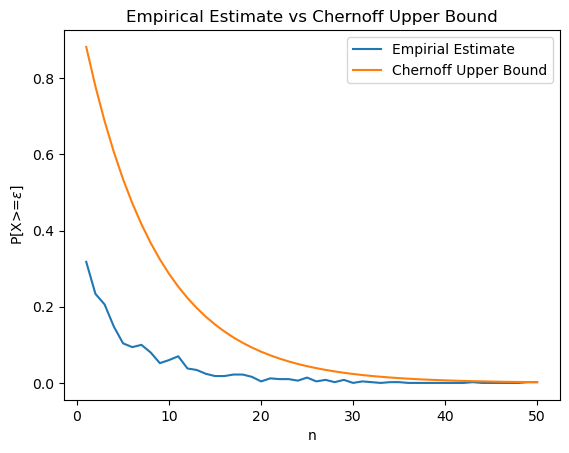

In [3]:
# write your code for this part here
import numpy as np
import matplotlib.pyplot as plt
#defining monte carlo simulation
def monte_carlo_simulation(n, N, sigma, epsilon):
    #to simulate experiments and count values according to average exceedance
    count = 0
    for i in range(N):
        #random variables following gaussian distribution
        samples = np.random.normal(0, sigma, n)
        #computing sample average
        sample_avg = np.mean(samples)
        if sample_avg >= epsilon:
            #number of samples satisfying the criteria
            count += 1
    #probability of sample average value being greater than epsilon
    empirical_estimate = count/N
    return empirical_estimate
#defining chernoff upper bound 
def chernoff_upper_bound(n, sigma, epsilon):
    return np.exp(-n*epsilon**2 / (2*sigma**2))
#parameters
n_values = range(1,51)
N = 500 #number of experiments
sigma = 0.1 
epsilon = 0.05
#computing functions for different values of n
x = [monte_carlo_simulation(n, N, sigma, epsilon) for n in n_values]
y = [chernoff_upper_bound(n, sigma, epsilon)for n in n_values]
#plotting empirical estimate and chernoff upper bound as a function of n
plt.plot(n_values, x)
plt.plot(n_values,y)
plt.xlabel('n')
plt.ylabel('P[X>=$\epsilon$]') #latex mode for epsilon symbol
plt.title('Empirical Estimate vs Chernoff Upper Bound')
plt.legend(['Empirial Estimate', 'Chernoff Upper Bound'])
#Show the figure
plt.show()

